# Import Packages

In [34]:
import pandas as pd
import matplotlib

In [2]:
import os

In [3]:
path = r'/Users/carolinazea/Desktop/Data'

# Import British Review CSV file

In [5]:
df = pd.read_csv(os.path.join(path, 'BA_reviews.csv'), index_col = False)

In [38]:
# View first 10 rows

df.head(10)

,clean_reviews,polarity,subjective
0,I flying Warsaw one day meetings would flying ...,0.044079,0.417763
1,"Booked BA holiday Marrakech, posting negative ...",0.131061,0.297980
2,Extremely sub-par service. Highlights: No onli...,-0.005833,0.453333
3,I virtually gave British Airways three years a...,0.396970,0.571212
4,I pleasantly surprised airline could maintain ...,0.159470,0.619697
5,"British Airways late, website atrocious, let c...",-0.183333,0.395833
6,Flew Amman London Nov. 14 2022. Not sure type ...,-0.066667,0.589815
7,This worst experience I ever airline. I flew B...,0.095833,0.300000
8,Flying LHR T5 CPT November 2022: BA app websit...,0.021264,0.495690
9,Worst experience ever. Outbound flight cancell...,-0.400000,0.720000


## Import stopwords and remove characters - 'a', 'the', 'at', etc.

In [ ]:
# Sourced from: https://towardsdatascience.com/how-to-clean-text-data-639375414a2f

In [8]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carolinazea/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
stop_words = stopwords.words('english')
df['clean_reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

## Remove 'Reviews' column as we have cleaned up the column and named it 'clean_reviews'

In [11]:
df = df.drop('reviews', axis=1)

In [12]:
df.head(10)

,clean_reviews
0,I flying Warsaw one day meetings would flying ...
1,"Booked BA holiday Marrakech, posting negative ..."
2,Extremely sub-par service. Highlights: No onli...
3,I virtually gave British Airways three years a...
4,I pleasantly surprised airline could maintain ...
5,"British Airways late, website atrocious, let c..."
6,Flew Amman London Nov. 14 2022. Not sure type ...
7,This worst experience I ever airline. I flew B...
8,Flying LHR T5 CPT November 2022: BA app websit...
9,Worst experience ever. Outbound flight cancell...


# Sentiment Analysis

- Install textblob

In [13]:
conda install textblob -c conda-forge

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [14]:
from textblob import TextBlob
df['polarity'] = df['clean_reviews'].apply(lambda x: TextBlob(x).polarity)
df['subjective'] = df['clean_reviews'].apply(lambda x: TextBlob(x).subjectivity)

In [15]:
df.head(10)

,clean_reviews,polarity,subjective
0,I flying Warsaw one day meetings would flying ...,0.044079,0.417763
1,"Booked BA holiday Marrakech, posting negative ...",0.131061,0.297980
2,Extremely sub-par service. Highlights: No onli...,-0.005833,0.453333
3,I virtually gave British Airways three years a...,0.396970,0.571212
4,I pleasantly surprised airline could maintain ...,0.159470,0.619697
5,"British Airways late, website atrocious, let c...",-0.183333,0.395833
6,Flew Amman London Nov. 14 2022. Not sure type ...,-0.066667,0.589815
7,This worst experience I ever airline. I flew B...,0.095833,0.300000
8,Flying LHR T5 CPT November 2022: BA app websit...,0.021264,0.495690
9,Worst experience ever. Outbound flight cancell...,-0.400000,0.720000


# Sentiment analysis of Bigram/Trigram

In [ ]:
# Sourced from: https://medium.com/towards-data-science/text-analysis-basics-in-python-443282942ec5

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carolinazea/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english') + ['though']

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df['clean_reviews'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [20]:
df_ngram

,frequency,bigram/trigram
0,370,british airways
1,276,business class
2,199,cabin crew
3,159,customer service
4,131,london heathrow
...,...,...
128023,1,00 flight
128024,1,00 durban south
128025,1,00 durban
128026,1,00 day returned


In [21]:
df_ngram['polarity'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram['subjective'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

# Topic modeling
## Non-Negative Matrix Factorization (NMF)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline
tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
nmf = NMF(n_components=3)
pipe = make_pipeline(tfidf_vectorizer, nmf)
pipe.fit(df['clean_reviews'])
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
print_top_words(nmf, tfidf_vectorizer.get_feature_names(), n_top_words=3)

/Users/carolinazea/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Topic #0: business class, class seats, business class seats
Topic #1: british airways, customer service, connecting flight
Topic #2: cabin crew, club world, premium economy



/Users/carolinazea/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## LDA models - Latent Dirichlet Allocation

In [25]:
from sklearn.decomposition import LatentDirichletAllocation
tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
lda = LatentDirichletAllocation(n_components=3)
pipe = make_pipeline(tfidf_vectorizer, lda)
pipe.fit(df['clean_reviews'])
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=3)

Topic #0: british airways, business class, cabin crew
Topic #1: british airways, business class, london heathrow
Topic #2: british airways, business class, customer service



# Word Cloud

## Install wordcloud

In [32]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [33]:
conda install -c conda-forge wordcloud

Solving environment: done

## Package Plan ##

  environment location: /Users/carolinazea/opt/anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.8.2.2          |   py39ha30fb19_1         175 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         175 KB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/osx-64::python_abi-3.9-2_cp39 
  wordcloud          conda-forge/osx-64::wordcloud-1.8.2.2-py39ha30fb19_1 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


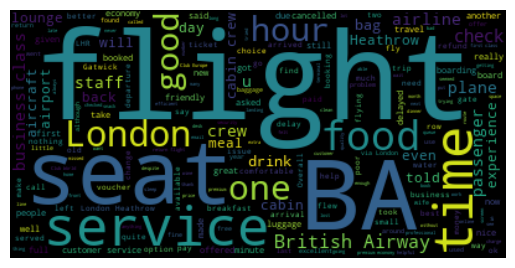

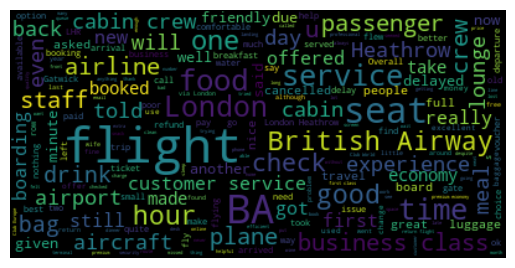

In [36]:
# Sourced from: https://github.com/amueller/word_cloud

import os

from os import path
from wordcloud import WordCloud

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = open(path.join(d, 'BA_reviews.csv')).read()

wordcloud = WordCloud().generate(text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

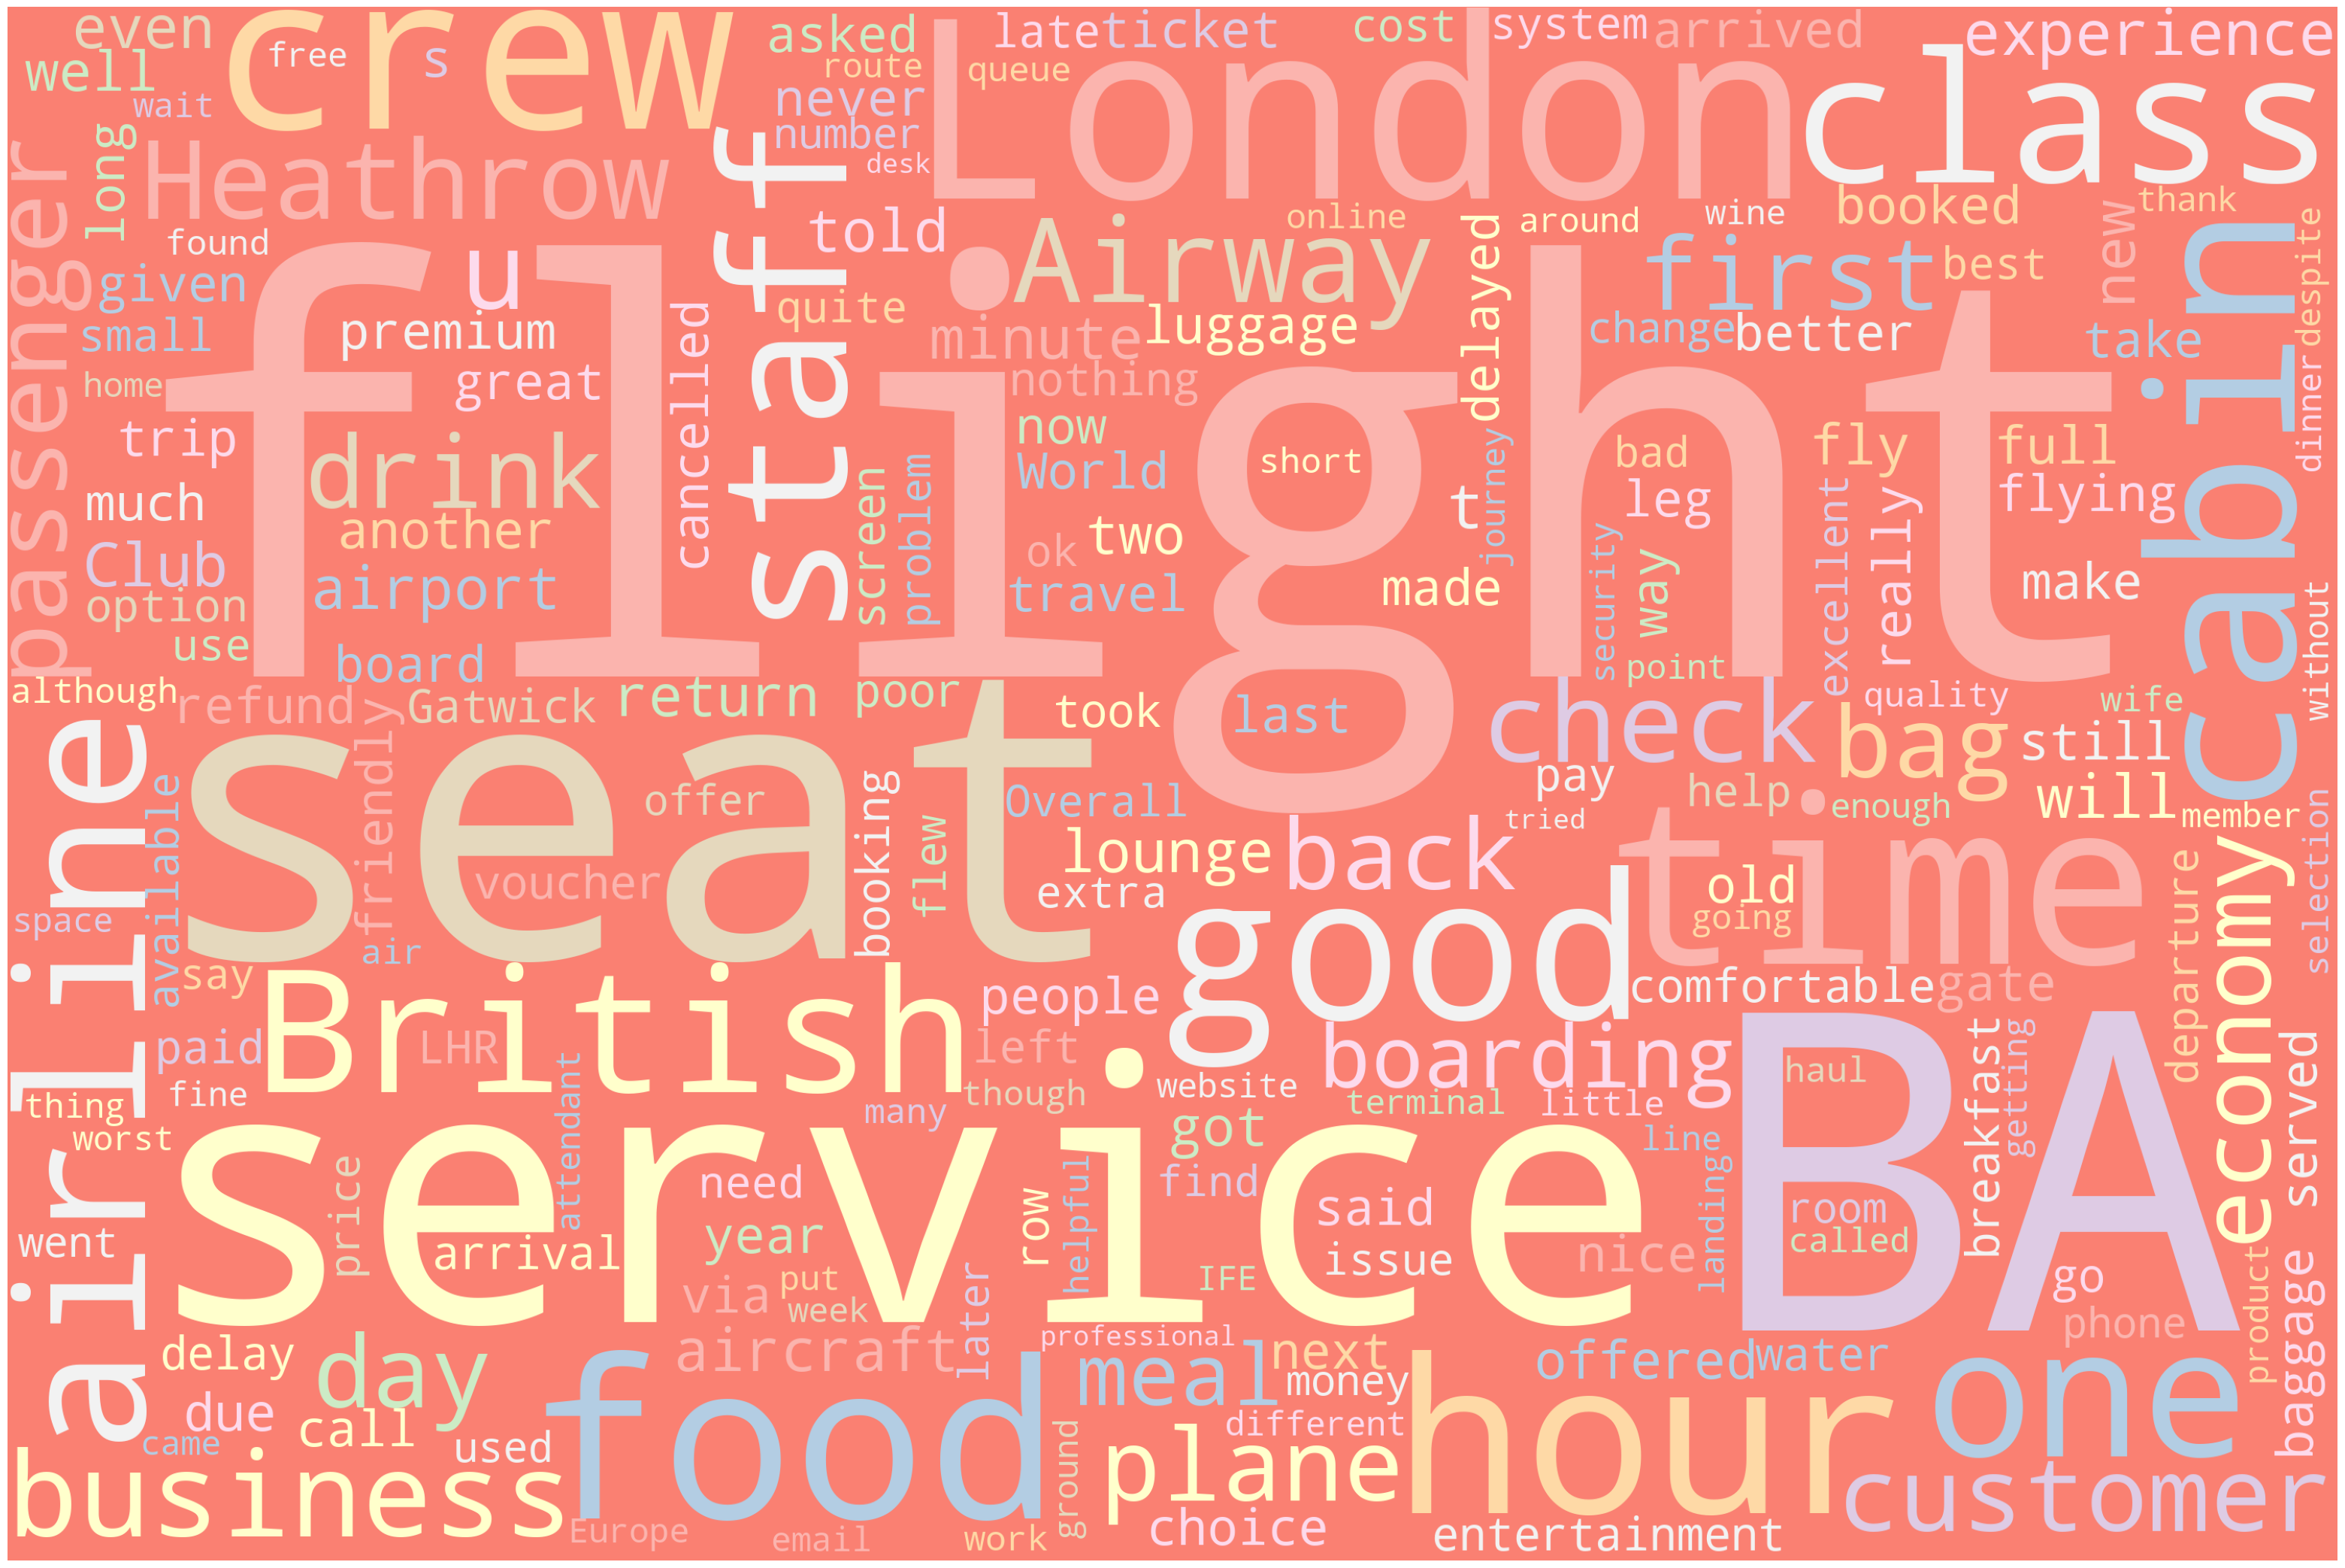

In [37]:
# Sourced from: https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)

plot_cloud(wordcloud)

### Customer reviews mentioned 'flight, seat, service, and time'

## vaderSentiment

In [ ]:
# Sourced from: https://github.com/Kavya2099/British-Airways-virtual-internship/blob/main/British_Airways_Task1.ipynb

In [43]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:0000:01


In [44]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['clean_reviews'].apply(vadersentimentanalysis)

def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,clean_reviews,polarity,subjective,Sentiment,Analysis
0,I flying Warsaw one day meetings would flying ...,0.044079,0.417763,-0.2406,Negative
1,"Booked BA holiday Marrakech, posting negative ...",0.131061,0.297980,0.9325,Positive
2,Extremely sub-par service. Highlights: No onli...,-0.005833,0.453333,0.3049,Neutral
3,I virtually gave British Airways three years a...,0.396970,0.571212,0.9780,Positive
4,I pleasantly surprised airline could maintain ...,0.159470,0.619697,0.8716,Positive


In [45]:
vadersentiment_count = df['Analysis'].value_counts()

In [46]:
vadersentiment_count

Positive    514
Negative    373
Neutral     113
Name: Analysis, dtype: int64

### Create pie chart

([<matplotlib.patches.Wedge at 0x7fdb36a55d30>,
 [Text(-0.04836492521093929, 1.0989362283632933, 'Positive'),
  Text(-0.33663042915454994, -1.0472248823281576, 'Negative'),
  Text(1.2658227549838803, -0.46924700634635863, 'Neutral')],
 [Text(-0.026380868296875973, 0.5994197609254327, '51.4%'),
  Text(-0.1836165977206636, -0.571213572178995, '37.3%'),
  Text(0.796999512397258, -0.29545181881067023, '11.3%')])

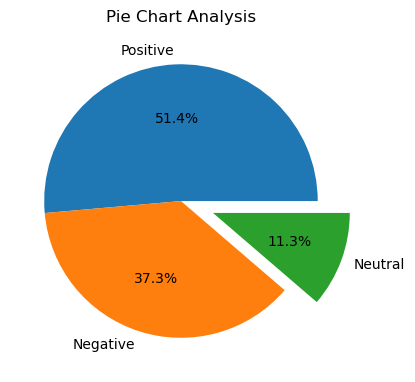

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Pie Chart Analysis")
plt.pie(vadersentiment_count.values, labels = vadersentiment_count.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

### Create pie chart using UK flag colors 

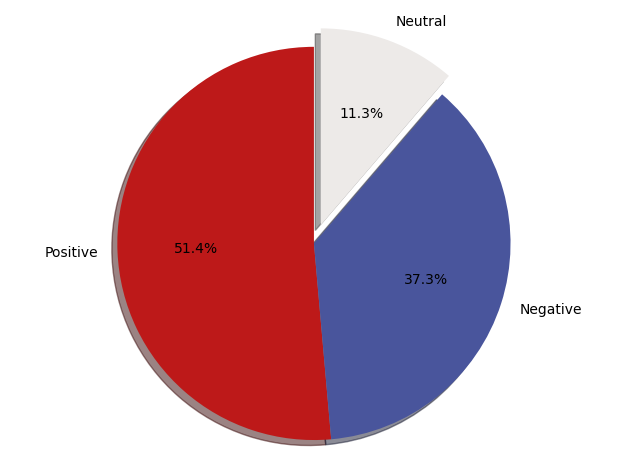

In [55]:
# Pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [51.4, 37.3, 11.3]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0.1)
#add colors
colors = ['#bd1919','#49559c','#edeae8',]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()